<a href="https://colab.research.google.com/github/ravitata/tensorflow2/blob/master/wk2_first_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Softmax

In [39]:
model = Sequential([
                    Flatten(input_shape=(28, 28), name='myflatlayer'),
                    Dense(16,activation='relu'),
                    Dense(16,activation='relu', name='myDense2'),
                    Dense(16,activation='tanh', name='mytanh'),
                    #Dense(10, activation='softmax'),
                    Dense(10),
                    Softmax(name='mysoftmax')
])

In [40]:
#model.weights
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
myflatlayer (Flatten)        (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 16)                12560     
_________________________________________________________________
myDense2 (Dense)             (None, 16)                272       
_________________________________________________________________
mytanh (Dense)               (None, 16)                272       
_________________________________________________________________
dense_25 (Dense)             (None, 10)                170       
_________________________________________________________________
mysoftmax (Softmax)          (None, 10)                0         
Total params: 13,274
Trainable params: 13,274
Non-trainable params: 0
_________________________________________________

In [41]:
print(784*16+16)
print(16*16+16)
print(16*10+10)

12560
272
170


In [42]:
n1=32  # input shape
f=16   #filter size
p=0   #padding
f=3   #no of filters (will be equal to no of channels in output)
s=1   #stride

n2 = (n1+2*p-f)/s + 1
print('Output shape=', n2)


Output shape= 30.0


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Softmax, Conv2D, MaxPooling2D

In [44]:
model = Sequential([
                    Conv2D(16, kernel_size=3,activation='relu', strides=1, padding='valid', input_shape=(28, 28, 1)),
                    MaxPooling2D(pool_size=3),
                    Flatten(),
                    Dense(10, activation='softmax')
])

In [45]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


In [46]:
8*8*16

1024

In [47]:
model = Sequential([
                    Conv2D(16, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)),
                    MaxPooling2D(pool_size=2),
                    Flatten(),
                    Dense(10, activation='softmax')
])

model.compile(optimizer='rmsprop', # adam, rmsprop, sgd, 
              loss='sparse_categorical_crossentropy',  #categorical_crossentropy
              metrics=['acc', 'mae'])

print(model.loss)
print(model.optimizer)
print(model.metrics_names)  #need to call fit before calling metrics_names


sparse_categorical_crossentropy
[]


### Instead of passing strings like above, we can pass Keras objects. It gives more flexibility as param can be passed

In [48]:
model = Sequential([
                    Conv2D(16, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)),
                    MaxPooling2D(pool_size=2),
                    Flatten(),
                    Dense(10, activation='softmax')
])

opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
loss = tf.keras.losses.SparseCategoricalCrossentropy()
acc=[tf.keras.metrics.Accuracy(), tf.keras.metrics.MeanAbsoluteError()]

model.compile(optimizer= opt,
              loss= loss,
              metrics=acc)

print(model.loss)
print(model.optimizer)

In [6]:
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
print(train_images.shape)
print(train_labels.shape)

print(test_images.shape)
print(test_labels.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [8]:
# Define the labels
labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [9]:
print(train_labels[0])
print(labels[train_labels[0]])

9
Ankle boot


In [10]:
train_images = train_images/255.0
test_images = test_images/255.0

In [11]:
import matplotlib.pyplot as plt

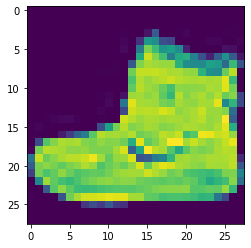

In [12]:
plt.imshow(train_images[0,:])

In [21]:
model = Sequential([
                    Conv2D(16, kernel_size=3,activation='relu', strides=1, padding='valid', input_shape=(28, 28, 1)),
                    MaxPooling2D(pool_size=3),
                    Flatten(),
                    Dense(10, activation='softmax')
])

opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc=tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer= opt, # adam, rmsprop, sgd, 
              loss='sparse_categorical_crossentropy',  #categorical_crossentropy
              metrics=[acc, mae])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


In [28]:
import numpy as np
import pandas as pd

In [18]:
train_images1 = train_images[..., np.newaxis]
print(train_images1.shape)

(60000, 28, 28, 1)


In [25]:
hist=model.fit(train_images1, train_labels, epochs=10, batch_size=256, verbose = 2)

Epoch 1/10
235/235 - 1s - loss: 0.2642 - sparse_categorical_accuracy: 0.9052 - mean_absolute_error: 4.4200
Epoch 2/10
235/235 - 1s - loss: 0.2659 - sparse_categorical_accuracy: 0.9035 - mean_absolute_error: 4.4200
Epoch 3/10
235/235 - 1s - loss: 0.2566 - sparse_categorical_accuracy: 0.9075 - mean_absolute_error: 4.4200
Epoch 4/10
235/235 - 1s - loss: 0.2538 - sparse_categorical_accuracy: 0.9088 - mean_absolute_error: 4.4200
Epoch 5/10
235/235 - 1s - loss: 0.2501 - sparse_categorical_accuracy: 0.9095 - mean_absolute_error: 4.4200
Epoch 6/10
235/235 - 1s - loss: 0.2487 - sparse_categorical_accuracy: 0.9094 - mean_absolute_error: 4.4200
Epoch 7/10
235/235 - 1s - loss: 0.2458 - sparse_categorical_accuracy: 0.9113 - mean_absolute_error: 4.4200
Epoch 8/10
235/235 - 1s - loss: 0.2388 - sparse_categorical_accuracy: 0.9137 - mean_absolute_error: 4.4200
Epoch 9/10
235/235 - 1s - loss: 0.2383 - sparse_categorical_accuracy: 0.9126 - mean_absolute_error: 4.4200
Epoch 10/10
235/235 - 1s - loss: 0.23

In [29]:
df = pd.DataFrame(hist.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.264227,0.905217,4.419999
1,0.265899,0.903517,4.420001
2,0.256580,0.907533,4.419999
3,0.253829,0.908817,4.420001
4,0.250102,0.909500,4.419999


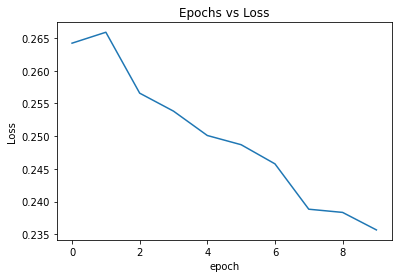

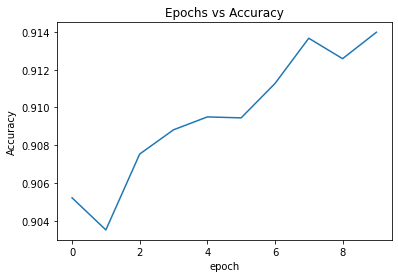

In [39]:
loss_plot = df.plot(y="loss", title = "Epochs vs Loss", legend=False, xlabel='epoch', ylabel='Loss')
acc_plot = df.plot(y="sparse_categorical_accuracy", title = "Epochs vs Accuracy", legend=False, xlabel='epoch', ylabel='Accuracy')